<a href="https://colab.research.google.com/github/adi271001/Nastech-Internship/blob/main/RNSIT8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#K-Means Clustering
import pandas as pd
df=pd.read_csv('https://raw.githubusercontent.com/ameenmanna8824/DATASETS/main/Mall_Customers.csv')
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
df.shape

(200, 5)

In [ ]:
df.size

1000

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
#in clustering we only take inputs
x=df.iloc[:,[3,4]].values
x


array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [ ]:
#our aim is to divide 200 rows into clusters
#but we don't know how many clusters to consider(k)
#to find exact values of k we have 2 methods
#1.Elbow Method
#2.Silhouette Score
import numpy as np
np.sqrt(200)

14.142135623730951

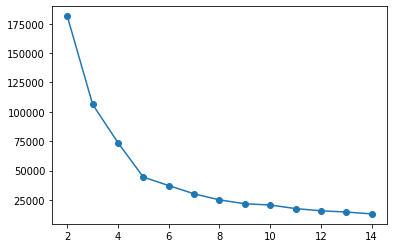

In [ ]:
#ELBOW METHOD
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
k=range(2,15) #inclusive and exclusive
sse=[]
for i in k:
  model_demo=KMeans(n_clusters=i,random_state=0)
  model_demo.fit(x)
  sse.append(model_demo.inertia_)
plt.scatter(k,sse)
plt.plot(k,sse)

In [ ]:
#Conclusion : We have assumed k 

In [ ]:
#the second way to find out k value is 
#silhouette score
#check score from k=2 to k=14(checks which cluster has the highest silhouette score)
from sklearn.metrics import silhouette_score
k=range(2,15)
for i in k:
  model_demo=KMeans(n_clusters=i,random_state =0)
  model_demo.fit(x)
  y=model_demo.predict(x)
  print(f'{i} Clusters,Score={silhouette_score(x,y)}')


2 Clusters,Score=0.2968969162503008
3 Clusters,Score=0.46761358158775435
4 Clusters,Score=0.4931963109249047
5 Clusters,Score=0.553931997444648
6 Clusters,Score=0.5379675585622219
7 Clusters,Score=0.5264283703685728
8 Clusters,Score=0.45704384633565154
9 Clusters,Score=0.4563032021725485
10 Clusters,Score=0.4492169169017592
11 Clusters,Score=0.437104484577306
12 Clusters,Score=0.42507724579994494
13 Clusters,Score=0.4361876168478583
14 Clusters,Score=0.40466460708668867


In [ ]:
#applying the kmeans algorithm
k=5
from sklearn.cluster import KMeans
model=KMeans(n_clusters=k,random_state=0)
model.fit(x)
y=model.predict(x)
y

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

In [ ]:
import numpy as np
np.unique(y,return_counts=True)

(array([0, 1, 2, 3, 4], dtype=int32), array([35, 81, 39, 22, 23]))

In [ ]:
np.sum([35, 81, 39, 22, 23])

200

In [ ]:
x[y==0,1] #the value of input when cluster is 0 is considered
# the second zero will be considered as index of x

array([29, 11,  9,  5,  7, 10,  5, 12, 36, 22, 17, 20, 16,  1,  1, 35,  5,
       26, 20, 27, 13, 10, 13, 15, 14, 32, 15, 39, 24, 17, 23,  8, 16, 28,
       18])

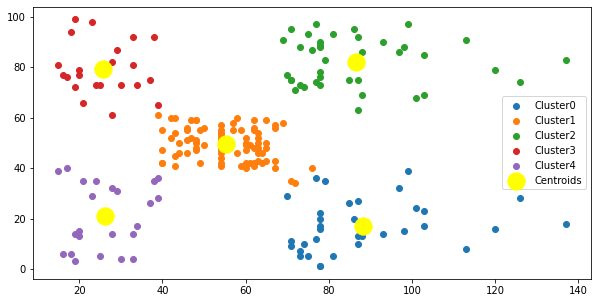

In [ ]:
plt.figure(figsize=(10,5))
for i in range(k):
  plt.scatter(x[y==i,0],x[y==i,1],label=f'Cluster{i}')
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],s=300,c='yellow',label='Centroids')
plt.legend()